In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
np.set_printoptions(precision=3, suppress=True)
print(tf.__version__)


2.6.0


In [8]:

import pandas as pd

dataset = pd.read_csv('GOOGL.csv') 
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
1,2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2,2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
3,2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
4,2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [9]:
# nombre de lignes et de colonnes

dataset.shape

(2335, 7)

In [10]:
# je supprime la colonne Date

dataset=dataset.drop(['Date'], axis=1)

In [11]:
# maintenent je divise les données en ensembles d'entrainement et de test
# j'utilise l'ensemble des données de test pour l'évaluation finale



train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print('pour l entrainement',train_dataset.shape)
print('pour les test', test_dataset.shape)

pour l entrainement (1868, 6)
pour les test (467, 6)


In [12]:
# je sépare les entités des étiquettes
# je sépare la valeur cible des caractéristiques ( features ). 
# c'est cette cible que le modele va devoir prédire.

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Close') # cible
test_labels = test_features.pop('Close') # cible

In [13]:
# je normalise les données avec (tf.keras.layers.Normalization)


normalizer = tf.keras.layers.Normalization(axis=-1)

In [14]:
normalizer.adapt(np.array(train_features))

2023-11-26 22:02:39.597440: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [15]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])


In [16]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error') # erreur absolue moyenne ou MAE


In [17]:
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [22]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='MAE')
  plt.plot(history.history['val_loss'], label='val_MAE')
  plt.ylim([0, 1000])
  plt.xlabel('Epoch')
  plt.ylabel('Error em milliers de $ [Close]')
  plt.legend()
  plt.grid(True)

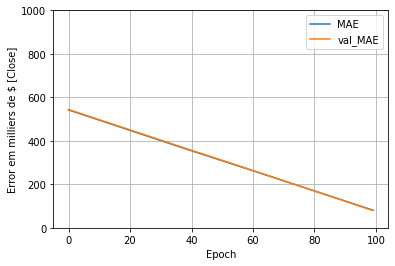

In [23]:
plot_loss(history)

In [24]:
# jecollecte les résultats sur le jeu de test:

test_resultats = {}

test_resultats['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)



In [25]:
# en $ 
# exemple 24 représent 24 $ de différence.
test_resultats

{'linear_model': 85.09585571289062}

In [26]:
# je fais des prédiction...

y_pred = linear_model.predict(test_features)
print('prédiction index 1 .....',y_pred[1:2])
print('valeur attendue en position 1 et index',test_labels[1:2])

prédiction index 1 ..... [[206.762]]
valeur attendue en position 1 et index 3    205.405411
Name: Close, dtype: float64
